# Homework 6: Hypothesis Testing and Permutation Testing

## Due Friday, December 1st at 11:59PM

Welcome to Homework 6, the last homework of the quarter! This homework covers hypothesis testing ([CIT 11](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)) and permutation testing ([CIT 12](https://inferentialthinking.com/chapters/12/Comparing_Two_Samples.html)).

### Instructions

You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

In [1]:
# Please don't change this cell, but do make sure to run it
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

from IPython.display import IFrame
def show_clt_slides():
    src = 'https://docs.google.com/presentation/d/e/2PACX-1vTcJd3U1H1KoXqBFcWGKFUPjZbeW4oiNZZLCFY8jqvSDsl4L1rRTg7980nPs1TGCAecYKUZxH5MZIBh/embed?start=false&loop=false&delayms=3000&rm=minimal'
    width = 700
    height = 370
    display(IFrame(src, width, height))

## 1. Was it by Random Chansey? 🎲

<img src='images/chansey.png' width='250'>

You recently decided to buy the video game *Pokémon Yellow* from someone on Ebay. The seller tells you that they've modified the game so that the probabilities of encountering certain Pokémon in certain locations have been altered. However, the seller doesn't tell you which specific locations have had their probability models changed and what they've been changed to.

As you are playing *Pokémon Yellow*, you arrive at the Safari Zone, one of the most iconic locations in the game. You're curious as to your chances of encountering your favorite Pokémon, Chansey, in this location. You go onto [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Kanto_Safari_Zone#Area_1) to find the probability model for this location, and you discover that for each Pokémon encounter in the Safari Zone, there is a 4% chance of encountering Chansey. 

After a few hours of gameplay in the Safari Zone, you have encountered Chansey **48 times out of 821** total Pokémon encounters (around 5.8%). You start to suspect that the Safari Zone may have been one of the locations in which the previous owner of the game changed the probability model.

To test this, you decide to run a hypothesis test with the following hypotheses:

**Null Hypothesis**: In your copy of *Pokémon Yellow*, the probability of encountering Chansey at each Pokémon encounter in the Safari Zone is 4%. 

**Alternative Hypothesis**: In your copy of *Pokémon Yellow*, the probability of encountering Chansey at each Pokémon encounter in the Safari Zone is greater than 4%.

**Question 1.1.** Complete the implementation of the function `one_simulation`, which has no arguments. It should randomly generate 821 Pokémon encounters in the Safari Zone and return the **proportion** of encountered Pokémon that were Chansey. 

***Hint:*** Use `np.random.multinomial`. You don't need a `for`-loop.

In [2]:
def one_simulation():
    
    probabilities = [0.04, 0.96]
    num_encounters = 821
    
    return (np.random.multinomial(num_encounters, probabilities) / num_encounters)[0]

In [3]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** The test statistic for our hypothesis test will be the difference between the proportion of Chansey encounters in a given sample of 821 Safari Zone encounters and the expected proportion of Chansey encounters.

$$\text{test statistic} = \text{proportion of Chansey encounters in sample} - 0.04$$

Let's conduct 10,000 simulations. Create an array named `proportion_diffs` containing 10,000 simulated values of the test statistic described above. Utilize the function created in the previous question to perform this task.

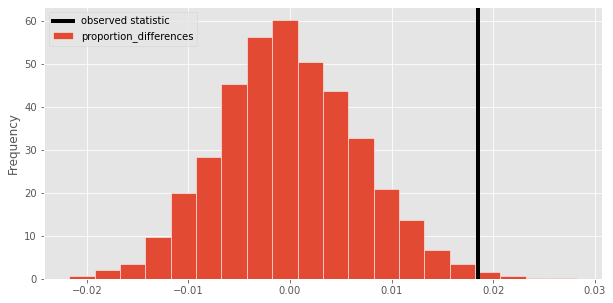

In [4]:
proportion_diffs = np.array([])

for i in np.arange(10_000):
    
    calc_diff = one_simulation() - 0.04
    proportion_diffs = np.append(proportion_diffs, calc_diff)

# Visualize with a histogram. Don't change anything below.
bpd.DataFrame().assign(proportion_differences=proportion_diffs).plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5));
plt.axvline(x=(48 / 821 - 0.04), color='black', linewidth=4, label='observed statistic')
plt.legend();

In [5]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Calculate the p-value for this hypothesis test, and assign the result to `safari_zone_p`.

***Hint:*** Do large values of our test statistic favor the alternative hypothesis, or do small values of our test statistic favor the alternative hypothesis?

In [6]:
safari_zone_p = np.count_nonzero(proportion_diffs >= (48 / 821 - 0.04)) / 10_000
safari_zone_p

0.0061

In [7]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Using the standard p-value cutoff of 0.05, what can we conclude from our hypothesis test? Assign either 1, 2, 3, or 4 to the variable `safari_zone_conclusion`, corresponding to the best conclusion.

   1. We reject the null hypothesis. There is not enough evidence to say if the observed data is consistent with the model.
   1. We reject the null hypothesis. The observed data is inconsistent with the model.
   1. We accept the null hypothesis. The observed data is consistent with the model.
   1. We fail to reject the null hypothesis. There is not enough evidence to say that the observed data is inconsistent with the model.

In [8]:
safari_zone_conclusion = 2

In [9]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** In this question, we chose as our test statistic the proportion of Chansey encounters in the Safari Zone minus 0.04. But this is not the only statistic we could have chosen; there are many that could have worked here. 

From the options below, choose the test statistic that would **not** have worked for this hypothesis test, and assign 1, 2, 3, or 4 to the variable `bad_choice`.

1. The proportion of Chansey encounters in the Safari Zone.
1. The number of Chansey encounters out of 821 enounters in the Safari Zone.
1. The absolute difference between 0.04 and the proportion of Chansey encounters in the Safari Zone.
1. 0.04 minus the proportion of Chansey encounters in the Safari Zone.

***Hint:*** Our goal is to find a test statistic that will help us determine whether we encounter Chansey **more** often than expected.

In [10]:
bad_choice = 3
bad_choice

3

In [11]:
grader.check("q1_5")

q1_5 results: All test cases passed!

## 2. <span> Mystery Box</span> 🎁 

<img src='images/subway_surfers.png' width='500'>

Subway Surfers is an "endless runner" mobile game where the player controls a character that continually runs forward along a subway track. The player tries to dodge obstacles and collect rewards along the way, all while avoiding train collisions and being caught by the subway inspector. One of the rewards is a Mystery Box which contains one of several possible prizes.

<img src='images/mystery_box.png' width='600'>

There are four types of prizes in a Mystery Box: `'Jackpot'`, `'Rare'`, `'Special'`, and `'Common'`. The most valuable is the `'Jackpot'` 🤩 but it's also the most rare. Unfortunately, there is no publicly available information on the exact probabilities of getting any of the four types of prizes in a Mystery Box. However, Mert plays Subway Surfers a lot, and based on his experience with the game, he proposes the following probability distribution.

| Type | Mert's Estimated Probability|
| --- | --- |
| Jackpot | $0.02$ |
| Rare | $0.10$ |
| Special | $0.25$ |
| Common | $0.63$ |

We'll store this distribution in an array, in the order `'Jackpot'`, `'Rare'`, `'Special'`, and `'Common'`:

In [12]:
# Just run this cell, do not change it!
mert_dist = np.array([0.02, 0.1, 0.25, 0.63])
mert_dist

array([0.02, 0.1 , 0.25, 0.63])

To assess the validity of Mert's model, you collect data from many Subway Surfers players. You learn that in total, out of 2,902 Mystery Box prizes:
- 43 were `'Jackpot'`,
- 329 were `'Rare'`,
- 667 were `'Special'`, and
- the rest were `'Common'`.

You then calculate the **empirical** type distribution using the data you collected and store it in an array as well (in the same order as before):

In [13]:
# Just run this cell, do not change it!
empirical_dist = np.array([43, 329, 667, 2902 - (43 + 329 + 667)]) / 2902
empirical_dist

array([0.01481737, 0.11337009, 0.22984149, 0.64197105])

While `empirical_dist` is not identical to `mert_dist`, it's still possible that Mert's model is plausible, and that the observed differences are due to random chance. Let's run a hypothesis test to investigate further, using the following hypotheses: 

**Null Hypothesis**: The types of Mystery Box prizes are drawn randomly from the distribution `mert_dist`.

**Alternative Hypothesis**: The types of Mystery Box prizes are _not_ drawn randomly from the distribution `mert_dist`.

Note that this hypothesis test involves four proportions – one for each of `'Jackpot'`, `'Rare'`, `'Special'`, and `'Common'`.

**Question 2.1.**  Which of the following is **not** a reasonable choice of test statistic for this hypothesis test? Assign 1, 2, or 3 to the variable `unreasonable_test_statistic`. 
1. The absolute difference between the sum of the proposed distribution (Mert's expected proportion of types) and the sum of the empirical distribution (actual proportion of types).
1. The sum of the absolute difference between the proposed distribution (Mert's expected proportion of types) and the empirical distribution (actual proportion of types).
1. Among all four prize types, the largest absolute difference between Mert's expected proportion and the actual proportion of prizes of that type.

In [14]:
unreasonable_test_statistic = 3

In [15]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** We'll use the TVD, i.e. **total variation distance**, as our test statistic. Below, complete the implementation of the function `total_variation_distance`, which takes in two distributions (stored as arrays) as arguments and returns the total variation distance between the two arrays.

Then, use the function `total_variation_distance` to determine the TVD between the type distribution proposed by Mert and the empirical type distribution you observed. Assign this TVD to `observed_tvd`.

In [16]:
def total_variation_distance(first_distrib, second_distrib):
    '''Computes the total variation distance between two distributions.'''
    return sum(abs(first_distrib - second_distrib)) / 2

observed_tvd = total_variation_distance(mert_dist, empirical_dist)
observed_tvd

0.025341144038594065

In [17]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Now, we'll calculate 5,000 simulated TVDs to see what a typical TVD between the proposed distribution and an empirical distribution would look like if Mert's model were accurate. Since our real-life data includes 2,902 Mystery Box prizes, in each trial of the simulation, we'll:
- draw 2,902 Mystery Boxes at random from Mert's proposed distribution, then 
- calculate the TVD between **Mert's proposed type distribution** and the **empirical type distribution from the simulated sample**. 

Store these 5,000 simulated TVDs in an array called `simulated_tvds`.

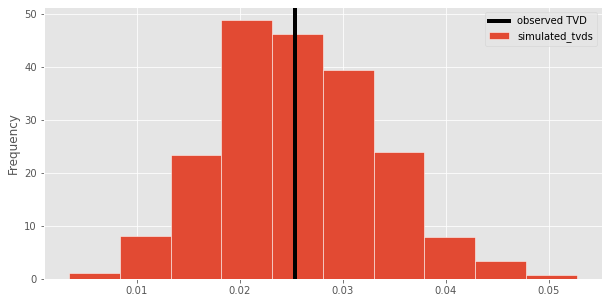

In [18]:
simulated_tvds = np.array([])

for i in np.arange(5_000):
    
    simulated_dist = np.random.multinomial(2902, mert_dist) / 2902
    tvd = total_variation_distance(simulated_dist, empirical_dist)

    simulated_tvds = np.append(simulated_tvds, tvd)
    
# Visualize the distribution of TVDs with a histogram
bpd.DataFrame().assign(simulated_tvds=simulated_tvds).plot(kind='hist', density=True, ec='w', figsize=(10, 5));
plt.axvline(x=observed_tvd, color='black', linewidth=4, label='observed TVD')
plt.legend();

In [19]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** Now, determine the p-value for our test by finding the proportion of times in our simulation that we saw a TVD greater than or equal to our observed TVD. Assign your result to `subway_surfers_p`.

In [20]:
subway_surfers_p = np.count_nonzero(simulated_tvds >= observed_tvd) / 2902
subway_surfers_p

0.861130254996554

In [21]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Using the standard p-value cutoff of 0.05, what can we conclude from our hypothesis test? Assign either 1, 2, 3, or 4 to the variable `subway_surfers_conclusion`, corresponding to the best conclusion.
   
   1. We accept the null hypothesis. The observed data is consistent with the model.
   1. We reject the null hypothesis. There is not enough evidence to say if the observed data is consistent with the model.
   1. We reject the null hypothesis. The observed data is inconsistent with the model.
   1. We fail to reject the null hypothesis. There is not enough evidence to say that the observed data is inconsistent with the model.

In [22]:
subway_surfers_conclusion = 4
subway_surfers_conclusion

4

In [23]:
grader.check("q2_5")

q2_5 results: All test cases passed!

## 3. Python vs Java 🐍☕

[Stack Overflow](https://stackoverflow.com/) is a forum where users can ask and answer questions about code. (If you've never used it before, it is a great resource!)

In this section, we'll work with a dataset of Stack Overflow questions from 2016 to 2020, downloaded from [Kaggle](https://www.kaggle.com/datasets/imoore/60k-stack-overflow-questions-with-quality-rate?resource=download&select=train.csv). The data has been cleaned and condensed for the purposes of this question.

The data contains six columns: `'Id'`, `'Title'`, `'Body'`, `'Tags'`, `'CreationDate'`, `'Rating'`. Let's read it in and store it as a DataFrame named `stack_overflow`.

| Column | Description |
| --- | --- |
| `'Id'` | ID of the question |
| `'Title'` | Title of the question |
| `'Body'` | Description of the question |
| `'Tags'` | Tags used to categorize question |
| `'CreationDate'` | Date the question was asked |
| `'Rating'` | Quality rating of the post |

In [24]:
stack_overflow = bpd.read_csv('data/stack_overflow.csv')
stack_overflow

,Id,Title,Body,Tags,CreationDate,Rating
0,34552974,How to get all the child records from differen...,I am having 4 different tables like \nselect *...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
1,34554721,Retrieve all except some data of the another t...,I have two table m_master and tbl_appointment\...,<php><mysql><sql><codeigniter><mysqli>,2016-01-01 08:43:50,LQ_EDIT
2,34555135,Pandas: read_html,<p>I'm trying to extract US states from wiki U...,<python><pandas>,2016-01-01 09:55:22,HQ
3,34555448,Reader Always gimme NULL,"I'm so new to C#, I wanna make an application ...",<sql-server><c#-4.0>,2016-01-01 10:43:45,LQ_EDIT
4,34555752,php rearrange array elements based on condition,basically i have this array:\n\n array(\n\t...,<php>,2016-01-01 11:34:09,LQ_EDIT
...,...,...,...,...,...,...
14995,60465681,How can I align two flex boxes to follow each ...,"<p>I have a menu, and I'd like the div.right-c...",<html><css><flexbox>,2020-02-29 13:32:56,LQ_CLOSE
14996,60467932,C++ The correct way to multiply an integer and...,<p>I try to multiply an integer by a double bu...,<c++>,2020-02-29 17:46:41,LQ_CLOSE
14997,60468378,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,*URLS.PY*\n //URLS.PY FILE\n from dj...,<django><django-views><django-templates>,2020-02-29 18:35:39,LQ_EDIT
14998,60469392,PHP - getting the content of php page,<p>I have a controller inside which a server i...,<javascript><php><html>,2020-02-29 20:32:14,LQ_CLOSE


**Question 3.1.**
Each post is given a quality rating. **We're interested in exploring whether Python posts have higher ratings than Java posts.**

To determine whether a post is about Python or Java, we can look in the `'Tags'` column. The values in the `'Tags'` column contain several tags that are used to categorize posts. One of the tags for each post will be the programming language the post is about – for instance, in row 2 above, one of the tags for the post is `'<python>'`.

Below, assign `python_java` to a DataFrame that only contains questions that used the tags `'<python>'` or `'<java>'`. Don't worry about capitalization as all the tags have already been lowercased. Note that these questions may include other tags as well. 

***Hints:*** 
- Use `str.contains`.
- There is a `'<javascript>'` tag, but that's not the same as the `'<java>'` tag, as JavaScript and Java are different programming languages.

In [25]:
python_java = stack_overflow[
    (stack_overflow.get('Tags').str.contains('<python>')) |
    (stack_overflow.get('Tags').str.contains('<java>')) 
]
python_java

,Id,Title,Body,Tags,CreationDate,Rating
2,34555135,Pandas: read_html,<p>I'm trying to extract US states from wiki U...,<python><pandas>,2016-01-01 09:55:22,HQ
9,34559136,Print list content in a given order,"<pre><code>lt = ['7,777.7', '777.7', '77,777.7...",<python><list><python-2.7><for-loop>,2016-01-01 19:08:12,LQ_CLOSE
13,34562473,Most Pythonic way to kill a thread after some ...,<p>I would like to run a process in a thread (...,<python><multithreading>,2016-01-02 04:01:41,HQ
16,34563454,Django ImageField upload_to path,<p>I'm having trouble understanding and using ...,<python><django>,2016-01-02 06:54:41,HQ
19,34564356,i am new to pythn and was trying to fix indent...,class Cylinder(object):\n self.pi = 3.1...,<python>,2016-01-02 09:22:24,LQ_EDIT
...,...,...,...,...,...,...
14986,60433781,Make this code shorter without using loops,<pre><code>import random\na = random.randrange...,<python><if-statement>,2020-02-27 12:56:18,LQ_CLOSE
14987,60434191,sort hashmap value of type list using java 8,<p>I have a map of String key and Value is Lis...,<java><arrays>,2020-02-27 13:20:20,LQ_CLOSE
14988,60436878,Sort python dictionary by value and the value ...,<p>I need to sort this dictionary by points: <...,<python><dictionary>,2020-02-27 15:44:19,LQ_CLOSE
14991,60451203,What is the name of the algorithm that can onl...,<p>I have tried googling this but no luck.</p>...,<python><algorithm><sorting>,2020-02-28 11:53:59,LQ_CLOSE


In [26]:
grader.check("q3_1")

q3_1 results: All test cases passed!

Upon further investigation, it looks like there are some posts that contain both the tags `'<python>'` and `'<java>'`. For the purposes of answering our question, we only want posts that have `'<python>'` or `'<java>'`, but not both. We've gone ahead and removed the posts that contained both tags and saved the resulting DataFrame to `fixed_python_java`, which you should use in Question 3.2.

In [27]:
# Don't change this cell; just run it.
fixed_python_java = python_java[python_java.get('Tags').str.contains('<python>') & python_java.get('Tags').str.contains('<java>') == False]
fixed_python_java

,Id,Title,Body,Tags,CreationDate,Rating
2,34555135,Pandas: read_html,<p>I'm trying to extract US states from wiki U...,<python><pandas>,2016-01-01 09:55:22,HQ
9,34559136,Print list content in a given order,"<pre><code>lt = ['7,777.7', '777.7', '77,777.7...",<python><list><python-2.7><for-loop>,2016-01-01 19:08:12,LQ_CLOSE
13,34562473,Most Pythonic way to kill a thread after some ...,<p>I would like to run a process in a thread (...,<python><multithreading>,2016-01-02 04:01:41,HQ
16,34563454,Django ImageField upload_to path,<p>I'm having trouble understanding and using ...,<python><django>,2016-01-02 06:54:41,HQ
19,34564356,i am new to pythn and was trying to fix indent...,class Cylinder(object):\n self.pi = 3.1...,<python>,2016-01-02 09:22:24,LQ_EDIT
...,...,...,...,...,...,...
14986,60433781,Make this code shorter without using loops,<pre><code>import random\na = random.randrange...,<python><if-statement>,2020-02-27 12:56:18,LQ_CLOSE
14987,60434191,sort hashmap value of type list using java 8,<p>I have a map of String key and Value is Lis...,<java><arrays>,2020-02-27 13:20:20,LQ_CLOSE
14988,60436878,Sort python dictionary by value and the value ...,<p>I need to sort this dictionary by points: <...,<python><dictionary>,2020-02-27 15:44:19,LQ_CLOSE
14991,60451203,What is the name of the algorithm that can onl...,<p>I have tried googling this but no luck.</p>...,<python><algorithm><sorting>,2020-02-28 11:53:59,LQ_CLOSE


**Question 3.2.** As we have seen, posts can be associated with multiple tags, but the only piece of information in the `'Tags'` column we're interested in is whether the language of the post is Python or Java.

Complete the implementation of the function `simplify_tag`, which takes in a string of tags associated with a single post and returns either `'Python'` or `'Java'`. 

Once you've done that, use your function to help you create a new DataFrame named `with_language` that has all the same columns as `fixed_python_java`, in the same order, with an additional column named `'Language'` that contains the programming language associated with the post.

In [28]:
def simplify_tag(tag): 
    
    if 'python' in tag:
        return 'python'
    
    elif 'java' in tag:
        return 'java'
    
with_language = fixed_python_java.assign(Language = fixed_python_java.get('Tags').apply(simplify_tag))
with_language

,Id,Title,Body,Tags,CreationDate,Rating,Language
2,34555135,Pandas: read_html,<p>I'm trying to extract US states from wiki U...,<python><pandas>,2016-01-01 09:55:22,HQ,python
9,34559136,Print list content in a given order,"<pre><code>lt = ['7,777.7', '777.7', '77,777.7...",<python><list><python-2.7><for-loop>,2016-01-01 19:08:12,LQ_CLOSE,python
13,34562473,Most Pythonic way to kill a thread after some ...,<p>I would like to run a process in a thread (...,<python><multithreading>,2016-01-02 04:01:41,HQ,python
16,34563454,Django ImageField upload_to path,<p>I'm having trouble understanding and using ...,<python><django>,2016-01-02 06:54:41,HQ,python
19,34564356,i am new to pythn and was trying to fix indent...,class Cylinder(object):\n self.pi = 3.1...,<python>,2016-01-02 09:22:24,LQ_EDIT,python
...,...,...,...,...,...,...,...
14986,60433781,Make this code shorter without using loops,<pre><code>import random\na = random.randrange...,<python><if-statement>,2020-02-27 12:56:18,LQ_CLOSE,python
14987,60434191,sort hashmap value of type list using java 8,<p>I have a map of String key and Value is Lis...,<java><arrays>,2020-02-27 13:20:20,LQ_CLOSE,java
14988,60436878,Sort python dictionary by value and the value ...,<p>I need to sort this dictionary by points: <...,<python><dictionary>,2020-02-27 15:44:19,LQ_CLOSE,python
14991,60451203,What is the name of the algorithm that can onl...,<p>I have tried googling this but no luck.</p>...,<python><algorithm><sorting>,2020-02-28 11:53:59,LQ_CLOSE,python


In [29]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** As a reminder, we're interested in exploring whether Python posts have higher ratings than Java posts. In order to do that, we need to have ratings in the form of numbers, but right now, the `'Rating'` column contains categorical values. The [Kaggle](https://www.kaggle.com/datasets/imoore/60k-stack-overflow-questions-with-quality-rate?resource=download&select=train.csv) page describes these values as follows: 

- `'HQ'`: High-quality posts without a single edit.
- `'LQ_EDIT'`: Low-quality posts with a negative score, and multiple community edits. However, they still remain open after those changes.
- `'LQ_CLOSE'`: Low-quality posts that were closed by the community without a single edit.

We're going to assign a numerical rating of `1` to low-quality posts that were closed (`'LQ_CLOSE'`), `2` to low-quality posts that remained open after edits ( `'LQ_EDIT'`) and `3` to high-quality posts (`'HQ'`).

Complete the implementation of the function `numerical_rating`, which takes in a **string** from the `'Rating'` column and returns the corresponding numerical rating as described above. Once you've implemented `numerical_rating`, use it to **replace** the values in the `'Rating'` column of `with_language` with the corresponding numerical ratings.

***Note:*** Our implementation of `numerical_rating` used only two lines of code, and one of the lines involved defining a dictionary. You don't have to use a dictionary in your implementation, but doing so will help keep your code concise!

In [30]:
def numerical_rating(rating):
    if rating == 'HQ':
        return 3
    elif rating == 'LQ_EDIT':
        return 2
    elif rating == 'LQ_CLOSE':
        return 1

with_language = with_language.assign(Rating=with_language.get('Rating').apply(numerical_rating))
with_language

,Id,Title,Body,Tags,CreationDate,Rating,Language
2,34555135,Pandas: read_html,<p>I'm trying to extract US states from wiki U...,<python><pandas>,2016-01-01 09:55:22,3,python
9,34559136,Print list content in a given order,"<pre><code>lt = ['7,777.7', '777.7', '77,777.7...",<python><list><python-2.7><for-loop>,2016-01-01 19:08:12,1,python
13,34562473,Most Pythonic way to kill a thread after some ...,<p>I would like to run a process in a thread (...,<python><multithreading>,2016-01-02 04:01:41,3,python
16,34563454,Django ImageField upload_to path,<p>I'm having trouble understanding and using ...,<python><django>,2016-01-02 06:54:41,3,python
19,34564356,i am new to pythn and was trying to fix indent...,class Cylinder(object):\n self.pi = 3.1...,<python>,2016-01-02 09:22:24,2,python
...,...,...,...,...,...,...,...
14986,60433781,Make this code shorter without using loops,<pre><code>import random\na = random.randrange...,<python><if-statement>,2020-02-27 12:56:18,1,python
14987,60434191,sort hashmap value of type list using java 8,<p>I have a map of String key and Value is Lis...,<java><arrays>,2020-02-27 13:20:20,1,java
14988,60436878,Sort python dictionary by value and the value ...,<p>I need to sort this dictionary by points: <...,<python><dictionary>,2020-02-27 15:44:19,1,python
14991,60451203,What is the name of the algorithm that can onl...,<p>I have tried googling this but no luck.</p>...,<python><algorithm><sorting>,2020-02-28 11:53:59,1,python


In [31]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Using the DataFrame `with_language`, calculate the difference between the **mean** `'Rating'` of Python posts and Java posts. Assign your answer to `observed_difference`.

$$\text{observed difference} = \text{mean Python post rating} - \text{mean Java post rating}$$

In [32]:
observed_difference = (
    with_language[with_language.get('Language') == 'python'].get('Rating').mean() - 
    with_language[with_language.get('Language') == 'java'].get('Rating').mean()
)

observed_difference

0.18072506141091238

In [33]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** What does the number you obtained for `observed_difference` mean? Assign `interpretation` to 1, 2, 3, or 4, corresponding to the best explanation below.

1. In our sample, the mean Python post rating is higher than the mean Java post rating by about 18 percent.
1. In our sample, the mean Python post rating is higher than the mean Java post rating by about 0.18 percent.
1. In our sample, the mean Python post rating is higher than the mean Java post rating by about 0.18 points.
1. In our sample, the mean Java post rating is higher than the mean Python post rating by about 18 percent.
1. In our sample, the mean Java post rating is higher than the mean Python post rating by about 0.18 percent.
1. In our sample, the mean Java post rating is higher than the mean Python post rating by about 0.18 points.

In [34]:
interpretation = 3

In [35]:
grader.check("q3_5")

q3_5 results: All test cases passed!

Now we want to conduct a permutation test to see if it is by chance that the average rating for Python posts is higher than the average rating of Java posts in our sample, or if Python posts actually have a higher rating on average than Java posts.

- **Null Hypothesis**: The ratings of Python posts and Java posts come from the same distribution.  
- **Alternative Hypothesis**: The ratings of Python posts are higher on average than the ratings of Java posts.

**Question 3.6.** Assign `reduced_df` to a DataFrame with only two columns, `'Language'` and `'Rating'`, since these are the only relevant columns in `with_language` for this permutation test.

<!--
BEGIN QUESTION
name: q3_6
-->

In [36]:
reduced_df = with_language.drop(columns=['Id', 'Title', 'Body', 'Tags', 'CreationDate'])
reduced_df

,Rating,Language
2,3,python
9,1,python
13,3,python
16,3,python
19,2,python
...,...,...
14986,1,python
14987,1,java
14988,1,python
14991,1,python


In [37]:
grader.check("q3_6")

q3_6 results: All test cases passed!

**Question 3.7.** To perform the permutation test, 1000 times, create two random groups by shuffling the `'Language'` column of `reduced_df`. Be sure not to shuffle the `'Rating'` column. For each pair of random groups, calculate the difference in mean rating (Python minus Java) and store your 1000 differences in the `differences` array.  

In [38]:
differences = np.array([])

for i in np.arange(1000):
    
    with_shuffled = (
        reduced_df
        .assign(
            Shuffled=np.random.permutation(reduced_df.get('Language'))
        )
        .groupby('Shuffled')
        .mean()
    )
    
    
    differences = np.append(differences, (with_shuffled.loc['python'].get('Rating') - with_shuffled.loc['java'].get('Rating')))

                            
# Just display the first ten differences.
differences[:10]

array([ 0.02420124,  0.02298787,  0.0023607 , -0.00855956, -0.00370611,
        0.03390814, -0.05466736, -0.00977293, -0.0304001 , -0.00127939])

In [39]:
grader.check("q3_7")

q3_7 results: All test cases passed!

**Question 3.8.** Compute a p-value for this hypothesis test and assign your answer to `stack_overflow_p`. To decide whether to use `<=` or `>=` in the calculation of the p-value, think about whether larger values or smaller values of our test statistic favor the alternative hypothesis.

In [40]:
observed_difference

0.18072506141091238

In [41]:
stack_overflow_p = np.count_nonzero(differences >= observed_difference) / 1000
stack_overflow_p

0.0

In [42]:
grader.check("q3_8")

q3_8 results: All test cases passed!

**Question 3.9.** Assign the variable `stack_overflow_conclusion` to a **list** of all the true statements below.

1. We accept the null hypothesis at the 0.01 significance level.
1. We reject the null hypothesis at the 0.01 significance level.
1. We fail to reject the null hypothesis at the 0.01 significance level.
1. We accept the null hypothesis at the 0.05 significance level.
1. We reject the null hypothesis at the 0.05 significance level.
1. We fail to reject the null hypothesis at the 0.05 significance level.

In [43]:
stack_overflow_conclusion = [2, 5]

In [44]:
grader.check("q3_9")

q3_9 results: All test cases passed!

**Question 3.10.** Suppose in this question you had shuffled the `'Rating'` column instead and kept the `'Language'` column in the same order. Assign `shuffled_rating` to either 1, 2, 3, or 4, corresponding to the true statement below.


1. The new p-value from shuffling `'Rating'` would be $1 - p$, where $p$ is the old p-value from shuffling `'Language'` (i.e. your answer to Question 3.8).
1. We would need to change our null hypothesis in order to shuffle the `'Rating'` column. 
1. There would be no difference in the conclusion of the test if we had shuffled the `'Rating'` column instead.
1. The `'Rating'` column cannot be shuffled because it contains numbers.

In [45]:
shuffled_rating = 3

In [46]:
grader.check("q3_10")

q3_10 results: All test cases passed!

**Question 3.11.** Which of the following choices best describes the purpose of shuffling one of the columns in our dataset in a permutation test? Assign `why_shuffle` to either 1, 2, 3, or 4, corresponding to the true statement below.

1. Shuffling mitigates noise in our data by generating new permutations of the data.
1. Shuffling is a special case of bootstrapping and allows us to produce interval estimates.
1. Shuffling allows us to generate new data under the null hypothesis, which we can use in testing our hypothesis.
1. Shuffling allows us to generate new data under the alternative hypothesis, which explains that the data come from different distributions.

In [47]:
why_shuffle = 3

In [48]:
grader.check("q3_11")

q3_11 results: All test cases passed!

## 4. Battery Life 🔋🎧

You and your friend are studying together for a final. Since both of you focus better when listening to music, you  challenge yourselves to study uninterrupted until each of your earbuds run out of battery. You own a pair of _Apple AirPods_ (i.e., AirPods) and your friend owns a pair of _Samsung Galaxy Buds Pro_ (i.e., Galaxy Buds). You both put on your earbuds and get to work.

At the end of the study session, you find that your AirPods, which were fully charged at the start, lasted 4 hours and 18 minutes, while your friend's Galaxy Buds, also fully charged at the start, lasted 4 hours and 41 minutes. Intrigued by the noticeable difference in battery life between the two earbuds, you decide to investigate further. You make a post on Reddit asking people who have AirPods or Galaxy Buds to record how long their earbuds last on a single charge. You're overwhelmed by the amazing response and receive 80 different comments in total from other people, 40 from people with AirPods and 40 from people with Galaxy Buds.

Let's look at all the data that you crowdsourced. Each entry in the `'BatteryLife'` column represents the amount of time that a pair of earbuds lasted on a full charge, in minutes.

In [49]:
battery_life_data = bpd.read_csv('data/earbuds.csv')
battery_life_data

,Brand,BatteryLife
0,Apple AirPods,265
1,Samsung Galaxy Buds Pro,290
2,Samsung Galaxy Buds Pro,289
3,Apple AirPods,298
4,Samsung Galaxy Buds Pro,255
...,...,...
75,Apple AirPods,304
76,Samsung Galaxy Buds Pro,295
77,Apple AirPods,282
78,Apple AirPods,274


In [50]:
battery_life_data[battery_life_data.get('Brand') == 'Apple AirPods']

,Brand,BatteryLife
0,Apple AirPods,265
3,Apple AirPods,298
5,Apple AirPods,284
7,Apple AirPods,292
8,Apple AirPods,272
...,...,...
72,Apple AirPods,279
75,Apple AirPods,304
77,Apple AirPods,282
78,Apple AirPods,274


**Question 4.1.** Now let's address the question: how does the average battery life of Galaxy Buds compare to that of AirPods? Create a DataFrame called `galaxy` that contains only the battery life data for Galaxy Buds, and set `galaxy_mean` to the mean battery life of Galaxy Buds. Similarly, create a DataFrame `airpods` for AirPods and compute `airpods_mean`. Finally, set `observed_diff_mean`, to the difference in mean battery life of Galaxy Buds and AirPods in our sample, computed as follows.

$$\text{difference} = \text{mean battery life of Galaxy Buds} - \text{mean battery life of AirPods}$$


In [51]:
galaxy = bpd.DataFrame().assign(
    battery_life=battery_life_data[battery_life_data.get('Brand') == 'Samsung Galaxy Buds Pro'].get('BatteryLife')
)
airpods = bpd.DataFrame().assign(
    battery_life=battery_life_data[battery_life_data.get('Brand') == 'Apple AirPods'].get('BatteryLife')
)
galaxy_mean = galaxy.get('battery_life').mean()
airpods_mean = airpods.get('battery_life').mean()
observed_diff_mean = galaxy_mean - airpods_mean
observed_diff_mean

5.7999999999999545

In [52]:
grader.check("q4_1")

q4_1 results: All test cases passed!

If you answered Question 4.1 correctly, you should have noticed a difference in the average battery life between Galaxy Buds and AirPods. But remember, we are only analyzing samples of size 40 for each brand. Would we observe such a difference in battery life if we had access to the entire population – that is, all units ever produced by both brands – or is it possible that this difference is merely a result of the specific samples we happened to collect? Let's do a **hypothesis test** to find out. We'll state our hypotheses as follows:

- **Null Hypothesis**: The average battery life of Galaxy Buds is equal to that of AirPods. In other words, the difference in average battery life between the two brands equals 0 minutes.

- **Alternative Hypothesis**: The average battery life of Galaxy Buds is not equal to that of AirPods. Hence, the difference in average battery life between the two brands is not 0 minutes.


Since we are able to frame our hypothesis test as a question of whether a certain population parameter – the difference in average battery life between Galaxy Buds and AirPods – is equal to a specific value, we can **test our hypotheses by constructing a confidence interval** for this parameter. For a refresher on this method, refer to [CIT 13.4](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) or the human body temperature example from [Lecture 22](https://dsc10.com/resources/lectures/lec22/lec22.html).

***Note:*** We are **not** conducting a permutation test here, although that would also be a valid approach to test these hypotheses.

**Question 4.2.** Compute 1000 **bootstrapped estimates** for the difference in average battery life between Galaxy Buds and AirPods. As in Question 4.1, calculate the difference as Galaxy Buds minus AirPods. Store your 1000 estimates in the `difference_means` array.

You should generate your Galaxy Buds resamples by sampling from `galaxy`, and your AirPods resamples by sampling from `airpods`. Do not use the combined dataset `battery_life_data` for this task, otherwise you might not wind up with 40 of each!

In [53]:
difference_means = np.array([])

for i in np.arange(1000):
    galaxy_resample = galaxy.sample(replace=True)
    airpod_resample = airpods.sample(replace=True)
    
    gr_mean = galaxy_resample.get('battery_life').mean()
    ar_mean = airpod_resample.get('battery_life').mean()
    
    difference_means = np.append(difference_means, gr_mean - ar_mean)
    
# Just display the first ten differences.
difference_means[:10]

array([ 41.,   1.,  11., -30.,  41.,  -3., -12.,  14.,   2.,  40.])

In [54]:
grader.check("q4_2")

q4_2 results: All test cases passed!

Let's visualize your estimates:

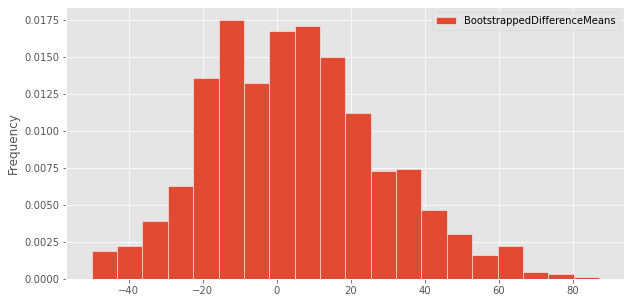

In [55]:
bpd.DataFrame().assign(BootstrappedDifferenceMeans = difference_means).plot(kind = 'hist', density=True, ec='w', bins=20, figsize=(10, 5));

**Question 4.3.** Compute a 95% confidence interval for the difference in mean battery life of AirPods and Galaxy Buds (as before, in the order Galaxy Buds minus AirPods). Assign the left and right endpoints of this confidence interval to `left_endpoint` and `right_endpoint` respectively. 

In [56]:
left_endpoint = np.percentile(difference_means, 2.5)
right_endpoint = np.percentile(difference_means, 97.5)

print('Bootstrapped 95% confidence interval for the mean difference in battery life of AirPods and Galaxy Buds:\n [{:f}, {:f}]'.format(left_endpoint, right_endpoint))

Bootstrapped 95% confidence interval for the mean difference in battery life of AirPods and Galaxy Buds:
 [-37.000000, 57.000000]


In [57]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Based on the confidence interval you've created, would you reject the null hypothesis at the 0.05 significance level? Set `reject_null` to True if you would reject the null hypothesis, and False if you would not.

In [58]:
reject_null = False

In [59]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5.** What if all the people who responded to your original Reddit post had provided their battery lives in hours instead of minutes? Would your hypothesis test still come to the same conclusion either way? Set `same_conclusion` to True or False.

In [60]:
same_conclusion = True

In [61]:
grader.check("q4_5")

q4_5 results: All test cases passed!

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Congratulations! You are done with Homework 6 – the final homework of the quarter! 🎉

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
1. Read through the notebook to make sure everything is fine and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

In [62]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q3_1 results: All test cases passed!

q3_10 results: All test cases passed!

q3_11 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q3_7 results: All test cases passed!

q3_8 results: All test cases passed!

q3_9 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!

q4_5 results: All test cases passed!